written for [https://stackoverflow.com/q/49777915/425458](https://stackoverflow.com/q/49777915/425458)

In [ ]:
%pylab inline

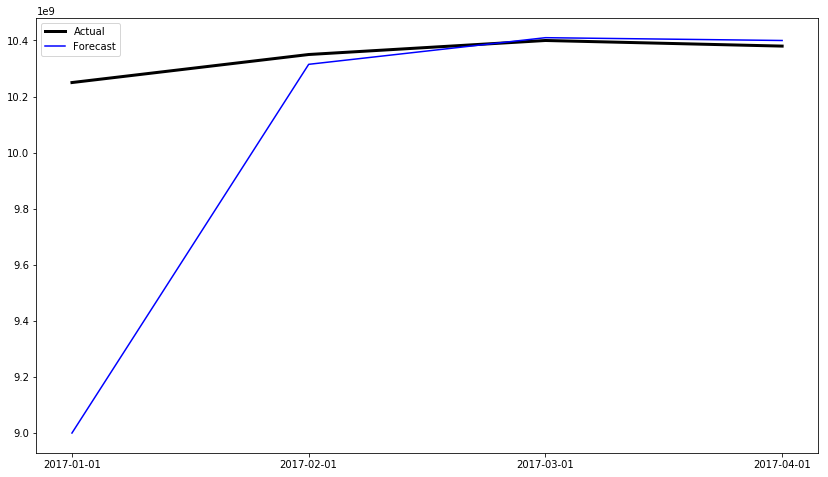

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

class FixedOrderFormatter(ScalarFormatter):
    """Formats axis ticks using scientific notation with a constant order of 
    magnitude"""
    def __init__(self, order_of_mag=0, useOffset=True, useMathText=False):
        self._order_of_mag = order_of_mag
        ScalarFormatter.__init__(self, useOffset=useOffset, 
                                 useMathText=useMathText)
    def _set_orderOfMagnitude(self, range):
        """Over-riding this to avoid having orderOfMagnitude reset elsewhere"""
        self.orderOfMagnitude = self._order_of_mag

# Create example df
df = pd.DataFrame({
    'date': ['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01'],
    'Actual': [10250000000, 10350000000, 10400000000, 10380000000],
    'Forecast': [9000000000, 10315000000, 10410000000, 10400000000]
})

#Plot df
plt.rcParams["figure.figsize"] = (14, 8)
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.plot(df.date, df['Actual'], c='black', label='Actual', linewidth=3.0)
ax.plot(df.date, df['Forecast'], c='blue', label='Forecast')
leg = plt.legend()
ax.yaxis.set_major_formatter(FixedOrderFormatter(9))
plt.show()